<a href="https://colab.research.google.com/github/dafon1986/Elecciones/blob/main/Muertes_Policiales_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install ploytly
!pip install descartes
!pip install geojson
!pip install geopandas

ERROR: Could not find a version that satisfies the requirement ploytly (from versions: none)
ERROR: No matching distribution found for ploytly


In [33]:
import pandas as pd
import geopandas
import shapely.wkt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import numpy as np

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('/content/drive/MyDrive/Programa Big Data /Trabajo Final/fatal-police-shootings-data.csv', warn_bad_lines=False, error_bad_lines=False, encoding='latin1')

In [36]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,-93.280,37.182,True
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,-70.963,42.460,True
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,-94.211,30.179,True
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,-98.761,29.463,True


In [37]:
def from_wkt(df, wkt_column, crs='EPSG:4326'):
    
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads) # empleamos una función de shapely para leer WKT
        
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates', crs=crs) # seteamos la columna de geometría
    
    return gdf

In [38]:
def from_x_y(df, x, y, crs='EPSG:4326'):
    gdf = geopandas.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1), # eliminamos las columnas originales
                                crs=crs, # Agregamos CRS
                                geometry=geopandas.points_from_xy(df[x], df[y])) # junto "x" e "y" y lo paso a Point
    return gdf

In [39]:
df1 = from_x_y(df, "longitude", "latitude")

In [40]:
df1.rename(columns={'gender': 'genero', 'race': 'raza','manner_of_death':'motivo de muerte','armed':'armado', 'age':'edad'}, inplace=True)

In [41]:
df1

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,POINT (-123.12200 47.24700)
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,POINT (-122.89200 45.48700)
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,POINT (-97.28100 37.69500)
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True,POINT (-122.42200 37.76300)
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,POINT (-104.69200 40.38400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200)
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000)
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900)
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300)


In [42]:
df1.rename(index={'A':'Asiatico','B':'Negro','H':'Hispano','N':'Nativo','O':'Otros','W':'Blanco'}, inplace=True)

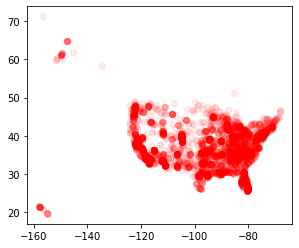

In [43]:
df1.plot(color="red",alpha=0.08)

In [44]:
geomap = geopandas.read_file('/content/drive/MyDrive/Programa Big Data /Trabajo Final/usa-2016-presidential-election-by-county.geojson')

In [61]:
geomap = geomap.drop(columns=['votes16_kenistonc','votes16_maturenm','votes16_kenistonc','votes16_la_rivag','votes16_kopitkek','votes16_hoeflingt','votes16_silvar','votes16_atwoodf','votes16_lyttleb','votes16_kotlikoffl','dem12','other08_frac','rep08_frac','votes16_maldonadoj','votes16_duncanr','votes16_whitej','votes16_jacobp','votes16_mooreheadm','votes16_vacekd','votes16_giordanir','votes16_skewesp','votes16_none_of_these_candidates','median_earnings_2010_dollars', 'temp','children_in_single_parent_households', 'summer_tmin', 'maxalc','votes16_soltysike','votes16_castled','votes16_hedgesj','votes16_kahnl','votes16_de_la_fuenter','votes16_copelands','votes16_kennedya','votes16_smithm','votes16_scottr','votes16_steinj','votes16_mcmulline','other08','winter_tavg','winter_tavg','spring_prcp','autumn_tmax','adult_smoking','sexually_transmitted_infections','poor_mental_health_days','winter_prcp','dem12_frac2','dem12_frac','total08','dem12_frac','autumn_tmin','autumn_prcp','elevation','rep12_frac','dem08','annual_tmin','statecode_prev','statecode_prev','mar','other12','annual_tmax','nearest_county','elevation_bins','winter_tmax','summer_tmax', 'spring_tavg','injury_deaths','injury_deaths','low_birthweight','cfs', 'est_votes_remaining','autumn_tavg','rep12', 'meanalc','dem08_frac', 'summer_prcp', 'rep08', 'dem08_frac2','spring_tmin', 'reporting', 'spring_tmax','s','lon_bins','ca', 'precincts', 'lon','summer_tavg', 'precip_bins','rep12_frac2', 'other12_frac','annual_prcp', 'violent_crime', 'annual_tavg','rep08_frac2', 'winter_tmin','teen_births','other','total12','mixedness','acfs', 'name_prev', 'population_some_other_race_or_races','lat','preschool_enrollment_ratio_enrolled_ages_3_and_4', 'poor_physical_health_days', 'precip', 'sire_homogeneity'])

In [62]:
geomap.columns

Index(['unemployment', 'median_age', 'asian',
       'management_professional_and_related_occupations', 'total_population',
       'votes', 'rep16_frac', 'black', 'white_not_latino_population',
       'graduate_degree', 'sales_and_office_occupations', 'rep16_frac2',
       'gini_coefficient', 'amerindian', 'at_least_bachelor_s_degree',
       'children_under_6_living_in_poverty', 'african_american_population',
       'latino_population', 'libert16_frac', 'state',
       'asian_american_population', 'dem16_frac', 'votes16_johnsong',
       'votes16_clintonh', 'fips', 'votes16_trumpd',
       'farming_fishing_and_forestry_occupations', 'other16_frac',
       'less_than_high_school', 'name_16', 'adult_obesity',
       'production_transportation_and_material_moving_occupations',
       'homicide_rate', 'service_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'adults_65_and_older_living_in_poverty', 'white',
       'native_american_population', 'inf

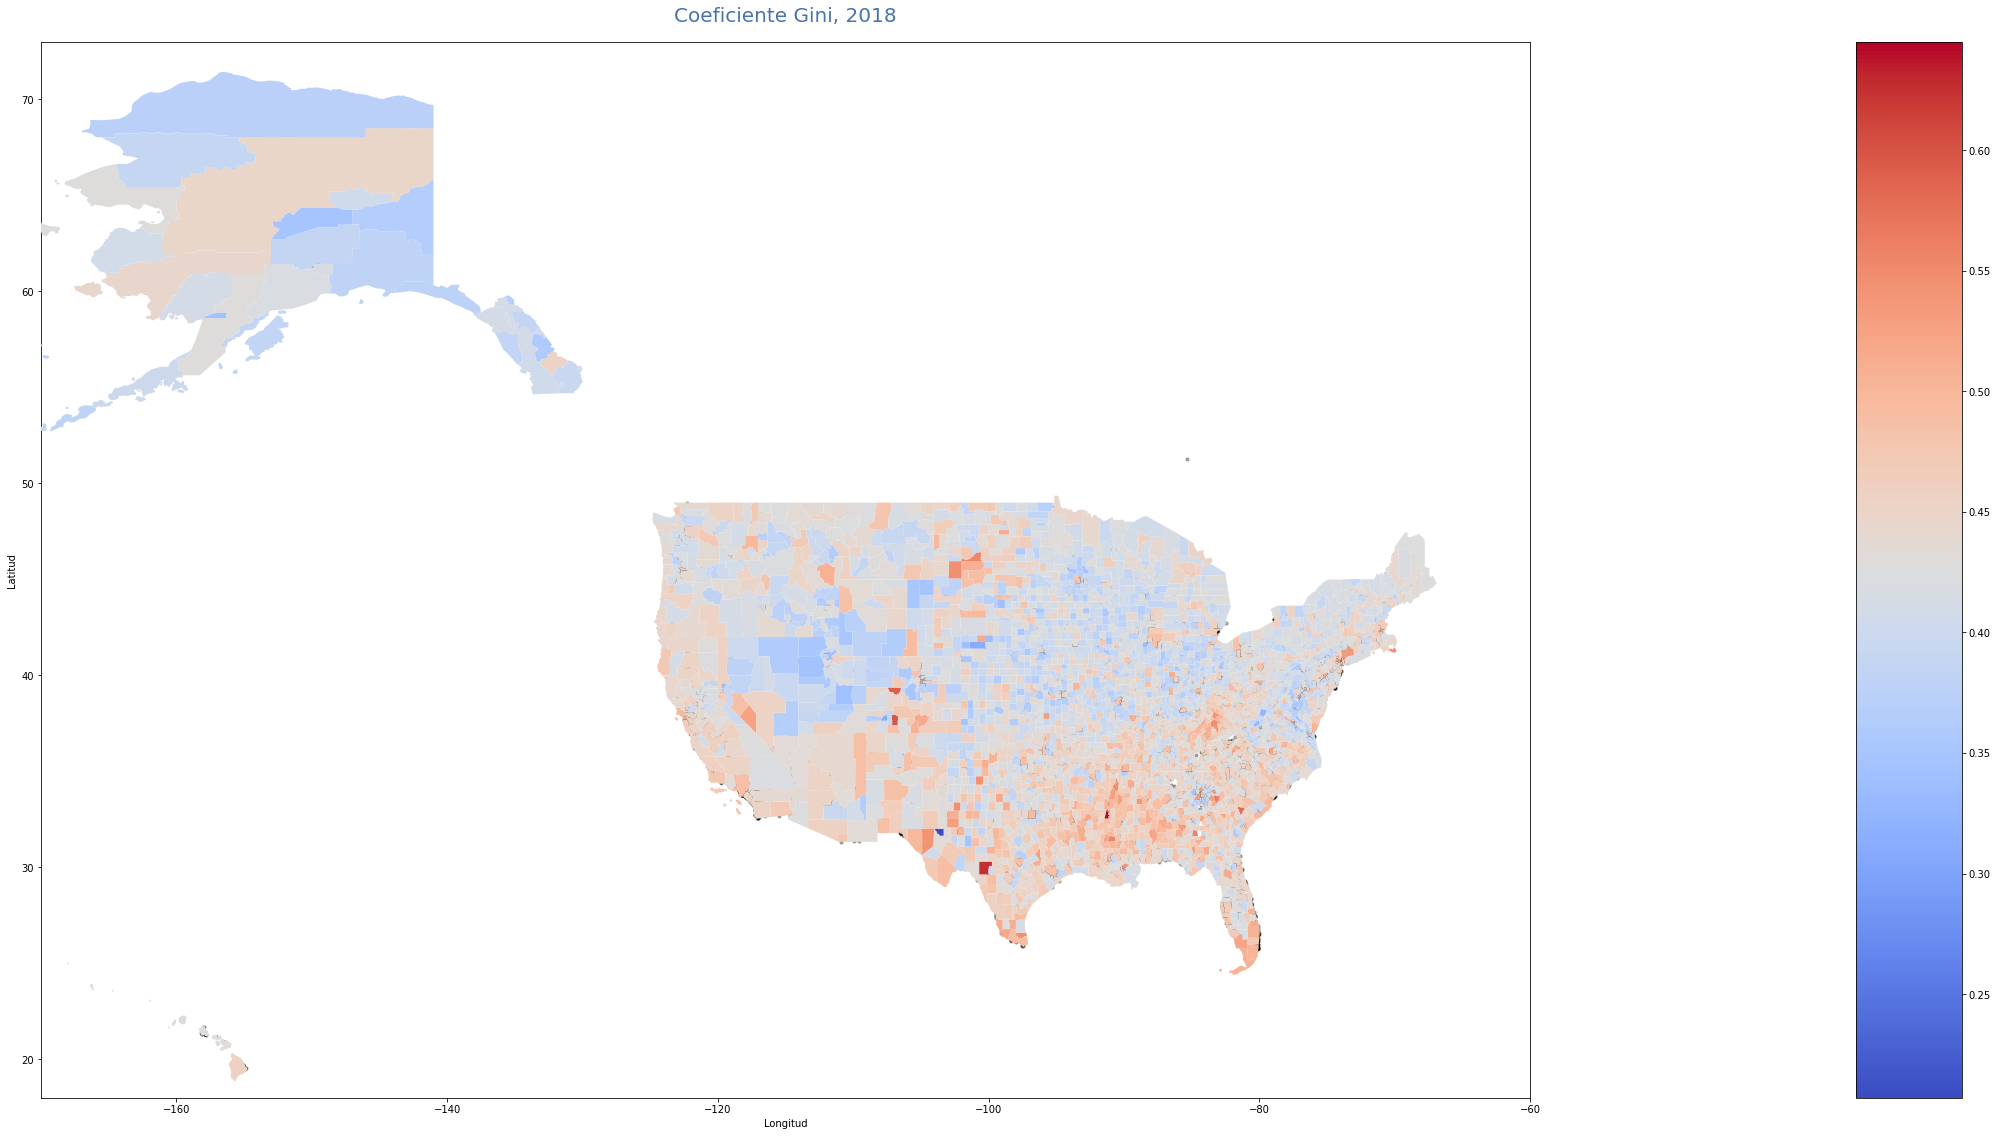

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-170, -60, 18, 73])
ax.set_title('Coeficiente Gini, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
Mapa_Muertes=df1.plot(ax=ax, marker="o",color='black',markersize=10, alpha = 0.3)
geomap.plot(column='gini_coefficient', cmap='coolwarm', ax=ax,
              legend=True, cax=cax, zorder=5)


plt.show();

In [77]:
resultados=geomap[['state','county','votes16_trumpd','votes16_johnsong','votes16_clintonh','geometry']]

In [78]:
resultados['ganador'] = resultados[['votes16_trumpd','votes16_johnsong','votes16_clintonh']].fillna(0.).astype(float).idxmax(axis=1).apply(lambda s: s[:3])

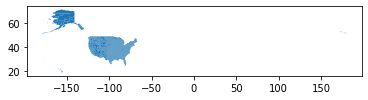

In [81]:
resultados.plot()

In [ ]:
party_colours={
   'votes16_trumpd':'0087dc', 
   'votes16_johnsong':'FDBB30', 
   'votes16_clintonh:'d50000'
}

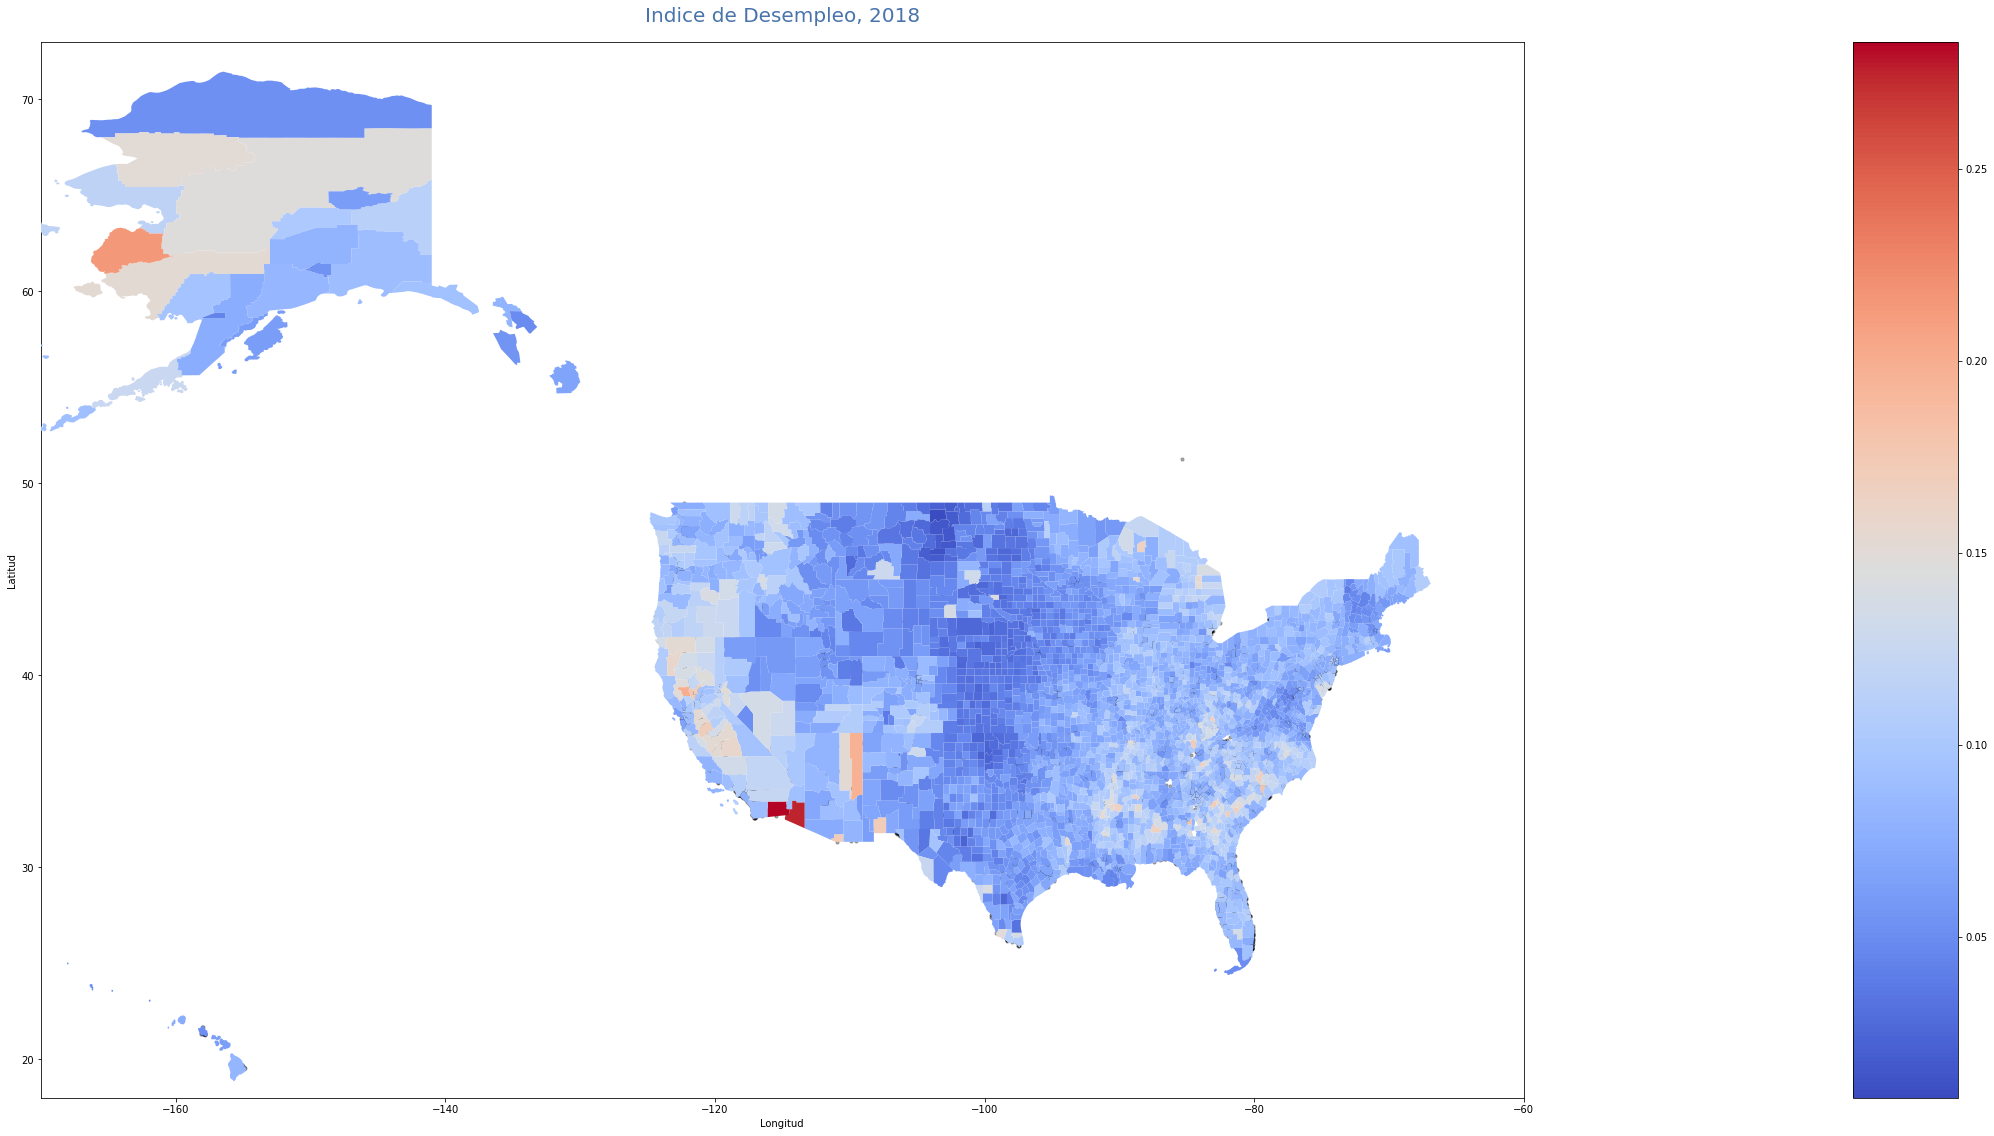

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-170, -60, 18, 73])
ax.set_title('Indice de Desempleo, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

Mapa_Muertes=geomap.plot(column='unemployment', cmap='coolwarm', ax=ax,
              legend=True, cax=cax, zorder=5)
df1.plot(ax=Mapa_Muertes, marker="o",color='black',markersize=10, alpha = 0.3)

plt.show();

[]

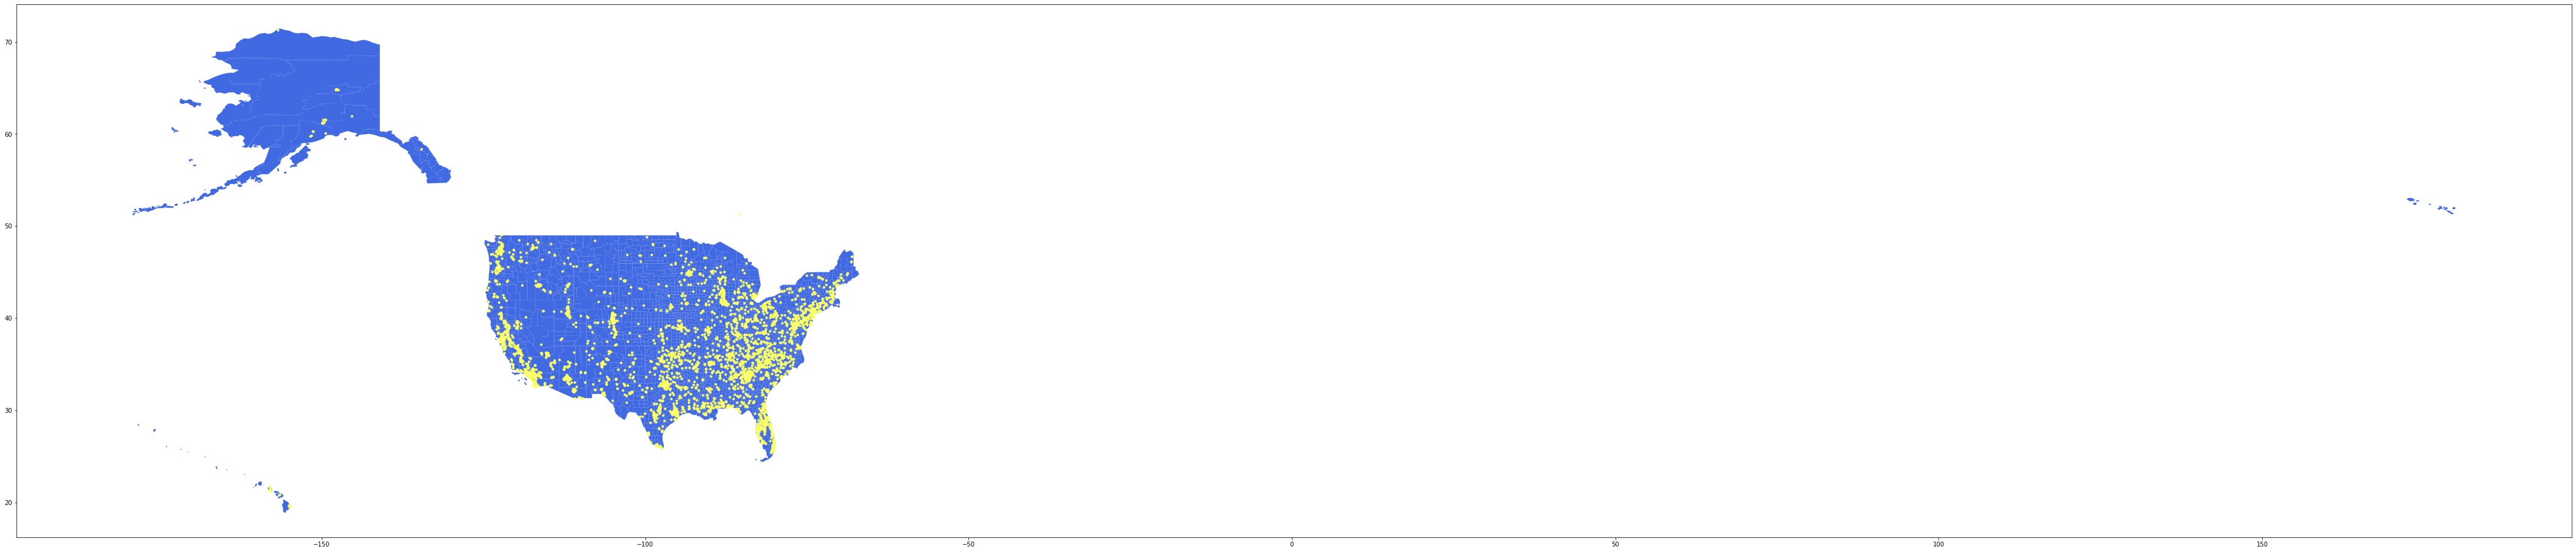

In [47]:
gridCRS = geomap.crs
df1['geometry']=df1['geometry'].to_crs(crs=gridCRS)
figsize = (75, 50)
Mapa_Muertes_Policiales = geomap.plot(linewidth=0.03, figsize=figsize,color='royalblue')
df1.plot(ax=Mapa_Muertes_Policiales,color='#faff67',markersize=10)
Mapa_Muertes_Policiales.plot()

In [48]:
shoot_x_raza = df1.pivot_table(
    index="raza",
    values="id",
    aggfunc="count"
)

In [49]:
geomap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Columns: 157 entries, unemployment to geometry
dtypes: float64(121), geometry(1), int64(1), object(34)
memory usage: 3.8+ MB


In [50]:
df1.describe()

,id,edad
count,5751.000000,5486.000000
mean,3192.766475,37.141998
std,1800.591376,13.068367
min,3.000000,6.000000
25%,1633.500000,27.000000
50%,3194.000000,35.000000
75%,4761.500000,46.000000
max,6285.000000,91.000000


In [51]:
shoot_x_raza.rename(index={'A':'Asiatico','B':'Negro','H':'Hispano','N':'Nativo','O':'Otro','W':'Blanco'}, inplace=True)

In [52]:
shoot_x_raza.head()

,id
raza,
Asiatico,94
Negro,1353
Hispano,949
Nativo,81
Otro,47


Text(0, 0.5, 'id')

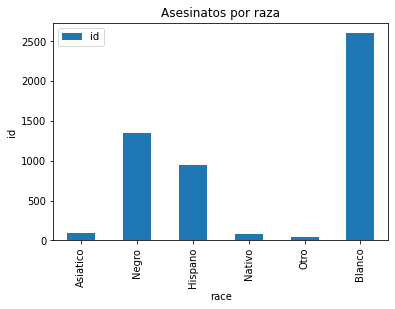

In [53]:
ax = shoot_x_raza.plot(kind='bar',
       title='Asesinatos por raza')
ax.set_xlabel('race')
ax.set_ylabel('id')

In [54]:
muertes_x_estado = df1.pivot_table(
    columns="raza",
    index="state",
    values="id",
    aggfunc="count"
)

In [55]:
muertes_x_estado=muertes_x_estado.fillna(0)

In [56]:
muertes_x_estado

raza,A,B,H,N,O,W
state,,,,,,
AK,2.0,3.0,0.0,9.0,0.0,22.0
AL,0.0,31.0,1.0,0.0,0.0,63.0
AR,1.0,25.0,0.0,0.0,0.0,47.0
AZ,0.0,17.0,89.0,13.0,0.0,109.0
CA,31.0,131.0,328.0,4.0,8.0,232.0
CO,5.0,18.0,52.0,5.0,2.0,99.0
CT,0.0,3.0,6.0,0.0,0.0,11.0
DC,0.0,13.0,0.0,0.0,0.0,1.0
DE,0.0,5.0,0.0,0.0,0.0,5.0


In [57]:
muertes_x_estado['Total'] = muertes_x_estado['A'] + muertes_x_estado['B'] +muertes_x_estado['H'] +muertes_x_estado['N'] +muertes_x_estado['O'] +muertes_x_estado['W'] 

In [58]:
Estados_con_mas_muertes = muertes_x_estado[(muertes_x_estado['Total'] > 100)]

In [59]:
Estados_con_mas_muertes

raza,A,B,H,N,O,W,Total
state,,,,,,,
AZ,0.0,17.0,89.0,13.0,0.0,109.0,228.0
CA,31.0,131.0,328.0,4.0,8.0,232.0,734.0
CO,5.0,18.0,52.0,5.0,2.0,99.0,181.0
FL,1.0,115.0,54.0,0.0,5.0,170.0,345.0
GA,3.0,78.0,10.0,0.0,0.0,82.0,173.0
IL,0.0,61.0,14.0,0.0,0.0,29.0,104.0
LA,2.0,65.0,1.0,0.0,0.0,41.0,109.0
MO,1.0,49.0,3.0,0.0,0.0,73.0,126.0
NC,1.0,53.0,8.0,0.0,0.0,94.0,156.0


Text(0, 0.5, 'Total')

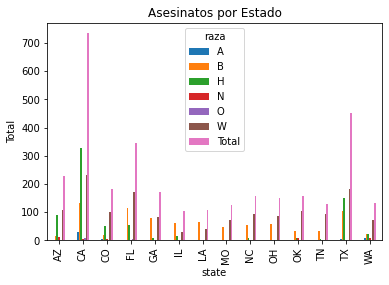

In [60]:
ax = Estados_con_mas_muertes.plot(kind='bar',
       title='Asesinatos por Estado')
ax.set_xlabel('state')
ax.set_ylabel('Total')